In [ ]:
import os

In [ ]:

!unzip "/content/OneDrive_1_4-13-2024.zip" -d "/content/data"

Archive:  /content/OneDrive_1_4-13-2024.zip
 extracting: /content/data/UNSW_NB15_testing-set.csv  
 extracting: /content/data/UNSW_NB15_training-set.csv  


In [ ]:
import pandas as pd

# Load the datasets
train_data_path = '/content/data/UNSW_NB15_training-set.csv'
test_data_path = '/content/data/UNSW_NB15_testing-set.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# Display the first few rows of the training and testing datasets
print(train_data.head())
print(test_data.head())


   id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0   

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from keras.optimizers import SGD
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
## Using train and test files separately, using all features

# TRAIN
train = pd.read_csv("/content/data/UNSW_NB15_testing-set.csv")

enc_proto = OneHotEncoder(handle_unknown='ignore')
trn_proto_enc = enc_proto.fit_transform(np.array(train['proto']).reshape(-1, 1))
enc_service = OneHotEncoder(handle_unknown='ignore')
trn_service_enc = enc_service.fit_transform(np.array(train['service']).reshape(-1, 1))
enc_state = OneHotEncoder(handle_unknown='ignore')
trn_state_enc = enc_state.fit_transform(np.array(train['state']).reshape(-1, 1))

train.drop(columns = ['proto', 'service', 'state'], inplace=True)
train['proto'] = trn_proto_enc.shape[0]
train['service'] = trn_service_enc.shape[0]
train['state'] = trn_state_enc.shape[0]

enc_y = OneHotEncoder(handle_unknown='ignore')
y_train = enc_y.fit_transform(np.array(train['attack_cat']).reshape(-1, 1)).toarray()

x_train_df = train
x_train_df.drop(columns = ['label', 'attack_cat', 'id'], inplace=True)

scaler = StandardScaler()
x_train = scaler.fit_transform(np.array(x_train_df))
y_train = np.array(y_train)

x_trn, x_val, y_trn, y_val = train_test_split(x_train, y_train, train_size=0.8)

# TEST
test = pd.read_csv("/content/data/UNSW_NB15_testing-set.csv")
test_proto_enc = enc_proto.transform(np.array(test['proto']).reshape(-1, 1))
test_service_enc = enc_service.transform(np.array(test['service']).reshape(-1, 1))
test_state_enc = enc_state.transform(np.array(test['state']).reshape(-1, 1))

x_test_df = test
test.drop(columns = ['proto', 'service', 'state'], inplace=True)
test['proto'] = test_proto_enc.shape[0]
test['service'] = test_service_enc.shape[0]
test['state'] = test_state_enc.shape[0]

y_test = enc_y.fit_transform(np.array(test['attack_cat']).reshape(-1, 1)).toarray()
x_test = test
x_test.drop(columns = ['label', 'attack_cat', 'id'], inplace=True)

x_test = scaler.transform(np.array(x_test))
y_test = np.array(y_test)

print(x_trn.shape, y_trn.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(65865, 42) (65865, 10) (16467, 42) (16467, 10) (82332, 42) (82332, 10)


In [ ]:
# enc_y = OneHotEncoder(handle_unknown='ignore')
# y_train = enc_y.fit_transform(np.array(train['attack_cat']).reshape(-1, 1)).toarray()

In [1]:
# x_trn, x_val, y_trn, y_val = train_test_split(train_data, train_size=0.8)

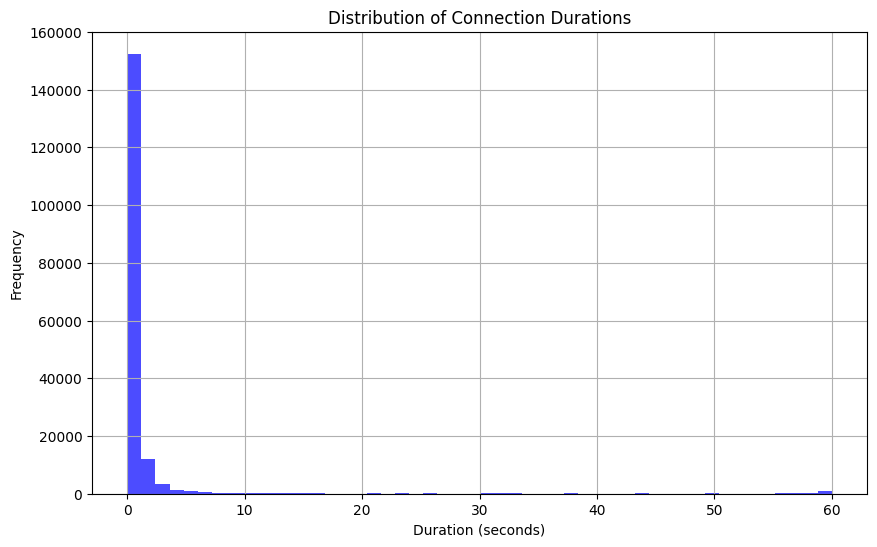

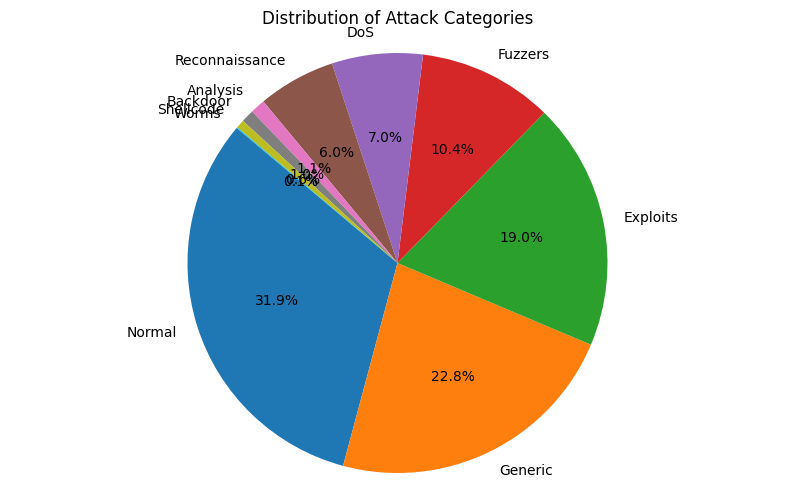

In [ ]:
import matplotlib.pyplot as plt

# Histogram of the duration of connections
plt.figure(figsize=(10, 6))
plt.hist(train_data['dur'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Connection Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Pie chart of attack categories
attack_categories = train_data['attack_cat'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(attack_categories, labels=attack_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Attack Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
test = pd.read_csv("/content/data/UNSW_NB15_testing-set.csv")
test_proto_enc = enc_proto.transform(np.array(test['proto']).reshape(-1, 1))
test_service_enc = enc_service.transform(np.array(test['service']).reshape(-1, 1))
test_state_enc = enc_state.transform(np.array(test['state']).reshape(-1, 1))

x_test_df = test
test.drop(columns = ['proto', 'service', 'state'], inplace=True)
test['proto'] = test_proto_enc.shape[0]
test['service'] = test_service_enc.shape[0]
test['state'] = test_state_enc.shape[0]

y_test = enc_y.fit_transform(np.array(test['attack_cat']).reshape(-1, 1)).toarray()
x_test = test
x_test.drop(columns = ['label', 'attack_cat', 'id'], inplace=True)

x_test = scaler.transform(np.array(x_test))
y_test = np.array(y_test)

# *feature selection*

XGBoost top features in order of importance:
['dttl', 'sttl', 'swin', 'sbytes', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_srv_dst', 'dbytes', 'smean', 'tcprtt', 'ct_state_ttl', 'dmean', 'ct_src_dport_ltm', 'response_body_len', 'ct_srv_src', 'trans_depth', 'sloss', 'dloss', 'dur', 'rate']


Text(0.5, 0, 'XBoost Feature Importance')

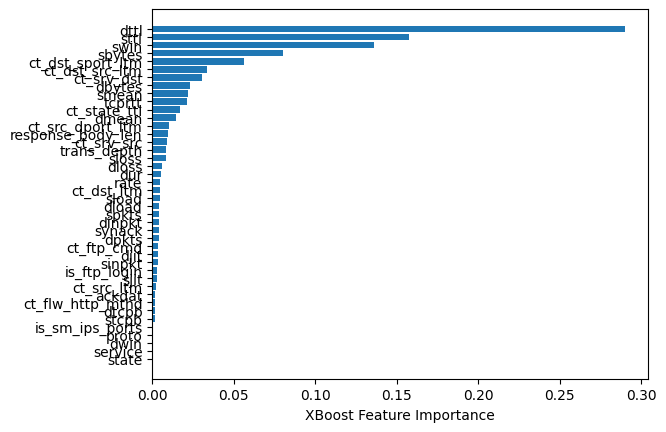

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_trn, y_trn)

sorted_idx = model.feature_importances_.argsort()

xgboost_top_features = x_train_df.columns[sorted_idx].tolist()
xgboost_top_features.reverse()
xgboost_top_features = xgboost_top_features[:20]

print("XGBoost top features in order of importance:")
print(xgboost_top_features)

plt.barh(x_train_df.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("XBoost Feature Importance")


In [ ]:
xgboost_top_features = xgboost_top_features
# print(xgboost_top_features)

train = pd.read_csv("/content/data/UNSW_NB15_training-set.csv")
test = pd.read_csv("/content/data/UNSW_NB15_testing-set.csv")

enc_y = OneHotEncoder(handle_unknown='ignore')
y_trn = enc_y.fit_transform(np.array(train['attack_cat']).reshape(-1, 1)).toarray()

x_trn = train.filter(xgboost_top_features)

scaler = StandardScaler()
x_trn = scaler.fit_transform(np.array(x_trn))

x_trn, x_val, y_trn, y_val = train_test_split(x_trn, y_trn, train_size=0.8)

y_test = enc_y.fit_transform(np.array(test['attack_cat']).reshape(-1, 1)).toarray()
x_test = test.filter(xgboost_top_features)
x_test = scaler.transform(np.array(x_test))

print(x_trn.shape, y_trn.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(140272, 20) (140272, 10) (35069, 20) (35069, 10) (82332, 20) (82332, 10)


In [ ]:
print(xgboost_top_features)

['dttl', 'sttl', 'sbytes', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_state_ttl', 'ct_srv_dst', 'dbytes', 'tcprtt', 'swin', 'smean', 'dmean', 'sloss', 'ct_src_dport_ltm', 'trans_depth', 'response_body_len', 'ct_srv_src', 'dloss', 'spkts', 'is_ftp_login']


In [ ]:
x_tst = x_test[:40000]
y_tst = y_test[:40000]


SGAN network

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, LeakyReLU, Dropout, Activation, Lambda
from keras.optimizers import Adam
import numpy as np

def define_generator(latent_dim, output_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim, activation='relu'))
    model.add(Dense(output_dim, activation='tanh'))  # 'tanh' or 'sigmoid' based on data preprocessing
    return model

def define_discriminator(input_dim, n_classes):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation=LeakyReLU(alpha=0.2)))
    model.add(Dropout(0.4))
      # Plus one for the 'fake' class
    return model

def define_supervised_discriminator(discriminator):
    model = Sequential()
    model.add(discriminator)
    model.add(Dense(n_classes))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])
    return model

def define_unsupervised_discriminator(discriminator):
    model = Sequential()
    model.add(discriminator)
    # model.add(Dense(20000, input_dim=input_dim, activation=LeakyReLU(alpha=0.2)))
    # model.add(Dropout(0.4))
    # # model.add(Dense(1024, input_dim=input_dim, activation=LeakyReLU(alpha=0.2)))
    # # model.add(Dropout(0.4))
    model.add(Dense(32, input_dim=input_dim, activation=LeakyReLU(alpha=0.2)))
    model.add(Dropout(0.4))
    model.add(Dense(n_classes + 1))
    # Using lambda to compute the unsupervised loss
    model.add(Lambda(lambda x: tf.math.reduce_max(x[:, :-1], axis=1) - x[:, -1], output_shape=(1,)))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
    return model

def define_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
    return model

# Example dimensions
latent_dim = 100  # Size of the noise vector
input_dim = 20 #x_trn.shape[1]  # Number of features in the input dataset
n_classes = 10#y_trn.shape[1]  # Assuming y_train is one-hot encoded

# Create the GAN components
generator = define_generator(latent_dim, input_dim)
discriminator = define_discriminator(input_dim, n_classes)
gan = define_gan(generator, discriminator)

# Create supervised and unsupervised versions of the discriminator
supervised_discriminator = define_supervised_discriminator(discriminator)
unsupervised_discriminator = define_unsupervised_discriminator(discriminator)


In [ ]:
def csv_to_xy(file):
    data = np.genfromtxt(file, delimiter=',')

    X = data[:, :20]  # Select first 20 columns for X
    y = data[:, 20:]  # Select remaining columns for Y

    print("Parsed file " + file + " and returned X shape: " + str(X.shape) + ", y shape:", str(y.shape))

    return X, y

In [ ]:
# train = pd.read_csv("/content/train_1000.csv")
# x_trn = train
# y_trn =
x_trn, y_trn = csv_to_xy("/content/train_140000.csv")
# x_test, y_test = csv_to_xy("/content/test_40000_rand.csv")
#x_unlabeled,y_unlabeled= csv_to_xy("/content/train_20000.csv")

Parsed file /content/train_140000.csv and returned X shape: (140000, 20), y shape: (140000, 10)


In [ ]:
x_trn, y_trn = csv_to_xy("/content/train_140000.csv")

Parsed file /content/train_140000.csv and returned X shape: (140000, 20), y shape: (140000, 10)


In [ ]:
import pandas as pd

x_trn = pd.read_csv('x_train_final.csv')
y_trn = pd.read_csv('y_train_final.csv')

In [ ]:
import numpy as np

# Assuming x_train and y_train are your training data and labels respectively
# x_train and y_train need to be numpy arrays or can be converted from other formats such as lists or Pandas DataFrames to numpy arrays

def shuffle_and_split_data(x_train, y_train, split_ratio=0.3):
    """
    Shuffles and splits the data into two sets according to the given split ratio.

    Parameters:
    - x_train: Features of the training data.
    - y_train: Labels of the training data.
    - split_ratio: Fraction of data to include in the smaller split.

    Returns:
    - x_train_1, y_train_1: Smaller portion of the data.
    - x_train_2, y_train_2: Larger portion of the data.
    """

    # Ensure that the data and labels match in the first dimension
    assert len(x_train) == len(y_train), "The features and labels must have the same number of samples."

    # Generate a permutation index array
    indices = np.random.permutation(len(x_train))

    # Calculate the split index
    split_idx = int(len(x_train) * split_ratio)

    # Shuffle data and labels in unison using the indices
    x_train_shuffled = x_train[indices]
    y_train_shuffled = y_train[indices]

    # Split the data and labels into two parts
    x_train_1, x_train_2 = x_train_shuffled[:split_idx], x_train_shuffled[split_idx:]
    y_train_1, y_train_2 = y_train_shuffled[:split_idx], y_train_shuffled[split_idx:]

    return x_train_1, y_train_1, x_train_2, y_train_2

# Example usage:
# x_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
# y_train = np.array([1, 0, 1, 0, 1])
x_train_1, y_train_1, x_train_2, y_train_2 = shuffle_and_split_data(x_trn, y_trn, split_ratio=0.3)

# print("Smaller split (30%):")
# print(x_train_1)
# print(y_train_1)

# print("Larger split (70%):")
# print(x_train_


In [ ]:
x_trn = np.array(x_trn)
y_trn = np.array(y_trn)

In [ ]:
y_trn.shape

(140272, 10)

Training the SGAN network

In [ ]:
import numpy as np

def train(generator, supervised_discriminator, unsupervised_discriminator, gan, x_train, y_train, latent_dim, n_epochs=100, n_batch=128):
    half_batch = int(n_batch/2)

    for epoch in range(n_epochs):
        # Randomly select half batch of real samples
        # idx = np.random.randint(0, x_train.shape[0], half_batch)
        # real_samples, labels = x_train[idx], y_train[idx]
        idx = np.random.randint(0, x_train_1.shape[0], half_batch)
        real_samples, labels = x_train_1[idx], y_train_1[idx]
        idx2 = np.random.randint(0, x_train_2.shape[0], half_batch)
        unlabel = x_train_2[idx]


        # Generate fake samples
        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_samples = generator.predict(noise)

        # Update supervised discriminator (classifier)
        d_loss_supervised, d_acc_supervised = supervised_discriminator.train_on_batch(real_samples, labels)

        # Update unsupervised discriminator
        # Train on real samples

        # d_loss_real = unsupervised_discriminator.train_on_batch(x_unlabeled, np.ones((2, 1)))
        d_loss_real = unsupervised_discriminator.train_on_batch(unlabel, np.ones((half_batch, 1)))



        # Train on fake samples
        d_loss_fake = unsupervised_discriminator.train_on_batch(fake_samples, np.zeros((half_batch, 1)))

        # Prepare points in latent space as input for the generator
        noise = np.random.normal(0, 1, (n_batch, latent_dim))
        # Create inverted labels for the fake samples
        misleading_targets = np.ones((n_batch, 1))

        # Update the generator via the discriminator's error
        g_loss = gan.train_on_batch(noise, misleading_targets)

        # Summarize loss and accuracy on this batch
        print('Epoch: %d, D Loss Supervised: %.3f, D Acc Supervised: %.2f%%, D Loss Real: %.3f, D Loss Fake: %.3f, G Loss: %.3f' %
              (epoch + 1, d_loss_supervised, d_acc_supervised*100, d_loss_real, d_loss_fake, g_loss))

        # Evaluate the model performance sometimes
        if (epoch + 1) % 10 == 0:
            summarize_performance(epoch, generator, supervised_discriminator, unsupervised_discriminator, x_trn, y_trn)

def summarize_performance(epoch, generator, supervised_discriminator, unsupervised_discriminator, x_train, y_train, n_samples=100):
    # Prepare real samples
    idx = np.random.randint(0, x_trn.shape[0], n_samples)
    real_samples, real_labels = x_trn[idx], y_trn[idx]

    # Evaluate discriminator on real examples
    _, accuracy = supervised_discriminator.evaluate(real_samples, real_labels, verbose=0)
    print('Accuracy on real samples: %.2f%%' % (accuracy * 100))

    # Generate fake examples
    noise = np.random.normal(0, 1, (n_samples, 100))
    fake_samples = generator.predict(noise)

    # Scatter plot real and fake data points
    plt.scatter(real_samples[:, 0], real_samples[:, 1], color='red')
    plt.scatter(fake_samples[:, 0], fake_samples[:, 1], color='blue')
    plt.title('Real and Fake Data Points')
    plt.show()


2/2 [==============================] - 0s 7ms/step
Epoch: 1, D Loss Supervised: 2.680, D Acc Supervised: 9.38%, D Loss Real: 0.490, D Loss Fake: 0.920, G Loss: 11.537
2/2 [==============================] - 0s 4ms/step
Epoch: 2, D Loss Supervised: 2.573, D Acc Supervised: 4.69%, D Loss Real: 0.462, D Loss Fake: 0.957, G Loss: 11.407
2/2 [==============================] - 0s 7ms/step
Epoch: 3, D Loss Supervised: 2.641, D Acc Supervised: 7.81%, D Loss Real: 0.452, D Loss Fake: 0.951, G Loss: 11.317
2/2 [==============================] - 0s 4ms/step
Epoch: 4, D Loss Supervised: 2.454, D Acc Supervised: 10.94%, D Loss Real: 0.485, D Loss Fake: 0.897, G Loss: 11.264
2/2 [==============================] - 0s 3ms/step
Epoch: 5, D Loss Supervised: 2.531, D Acc Supervised: 12.50%, D Loss Real: 0.413, D Loss Fake: 0.924, G Loss: 11.269
2/2 [==============================] - 0s 4ms/step
Epoch: 6, D Loss Supervised: 2.539, D Acc Supervised: 9.38%, D Loss Real: 0.452, D Loss Fake: 0.862, G Loss: 11.

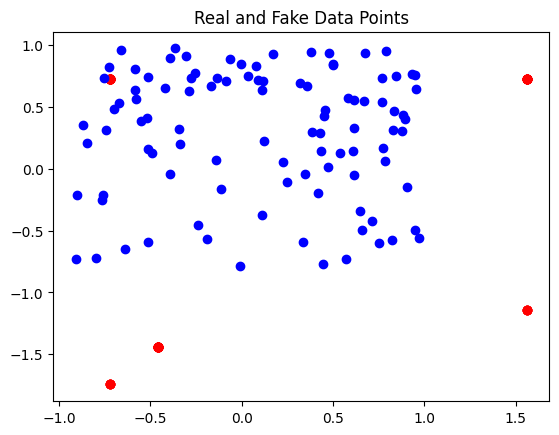

2/2 [==============================] - 0s 4ms/step
Epoch: 11, D Loss Supervised: 2.323, D Acc Supervised: 12.50%, D Loss Real: 0.456, D Loss Fake: 0.781, G Loss: 11.174
2/2 [==============================] - 0s 4ms/step
Epoch: 12, D Loss Supervised: 2.422, D Acc Supervised: 15.62%, D Loss Real: 0.437, D Loss Fake: 0.783, G Loss: 11.135
2/2 [==============================] - 0s 4ms/step
Epoch: 13, D Loss Supervised: 2.504, D Acc Supervised: 17.19%, D Loss Real: 0.389, D Loss Fake: 0.775, G Loss: 11.116
2/2 [==============================] - 0s 4ms/step
Epoch: 14, D Loss Supervised: 2.279, D Acc Supervised: 23.44%, D Loss Real: 0.433, D Loss Fake: 0.710, G Loss: 11.124
2/2 [==============================] - 0s 4ms/step
Epoch: 15, D Loss Supervised: 2.421, D Acc Supervised: 12.50%, D Loss Real: 0.403, D Loss Fake: 0.704, G Loss: 11.087
2/2 [==============================] - 0s 3ms/step
Epoch: 16, D Loss Supervised: 2.259, D Acc Supervised: 12.50%, D Loss Real: 0.389, D Loss Fake: 0.650, G

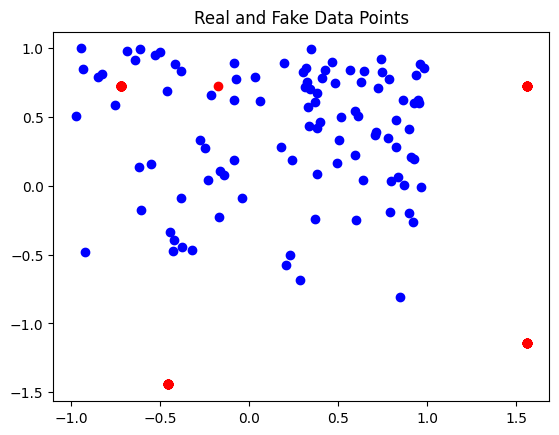

2/2 [==============================] - 0s 4ms/step
Epoch: 21, D Loss Supervised: 2.279, D Acc Supervised: 10.94%, D Loss Real: 0.398, D Loss Fake: 0.623, G Loss: 10.935
2/2 [==============================] - 0s 4ms/step
Epoch: 22, D Loss Supervised: 2.212, D Acc Supervised: 15.62%, D Loss Real: 0.366, D Loss Fake: 0.597, G Loss: 10.899
2/2 [==============================] - 0s 4ms/step
Epoch: 23, D Loss Supervised: 2.073, D Acc Supervised: 34.38%, D Loss Real: 0.368, D Loss Fake: 0.599, G Loss: 10.788
2/2 [==============================] - 0s 3ms/step
Epoch: 24, D Loss Supervised: 2.571, D Acc Supervised: 34.38%, D Loss Real: 0.340, D Loss Fake: 0.583, G Loss: 10.813
2/2 [==============================] - 0s 4ms/step
Epoch: 25, D Loss Supervised: 2.126, D Acc Supervised: 20.31%, D Loss Real: 0.340, D Loss Fake: 0.568, G Loss: 10.825
2/2 [==============================] - 0s 3ms/step
Epoch: 26, D Loss Supervised: 2.105, D Acc Supervised: 34.38%, D Loss Real: 0.339, D Loss Fake: 0.511, G

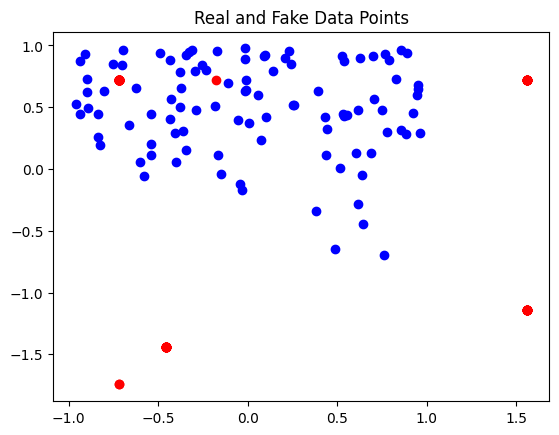

2/2 [==============================] - 0s 3ms/step
Epoch: 31, D Loss Supervised: 1.985, D Acc Supervised: 28.12%, D Loss Real: 0.332, D Loss Fake: 0.477, G Loss: 10.720
2/2 [==============================] - 0s 5ms/step
Epoch: 32, D Loss Supervised: 2.056, D Acc Supervised: 18.75%, D Loss Real: 0.301, D Loss Fake: 0.441, G Loss: 10.694
2/2 [==============================] - 0s 7ms/step
Epoch: 33, D Loss Supervised: 2.044, D Acc Supervised: 29.69%, D Loss Real: 0.289, D Loss Fake: 0.433, G Loss: 10.762
2/2 [==============================] - 0s 4ms/step
Epoch: 34, D Loss Supervised: 2.046, D Acc Supervised: 25.00%, D Loss Real: 0.248, D Loss Fake: 0.436, G Loss: 10.667
2/2 [==============================] - 0s 4ms/step
Epoch: 35, D Loss Supervised: 2.029, D Acc Supervised: 29.69%, D Loss Real: 0.311, D Loss Fake: 0.411, G Loss: 10.661
2/2 [==============================] - 0s 4ms/step
Epoch: 36, D Loss Supervised: 2.063, D Acc Supervised: 25.00%, D Loss Real: 0.271, D Loss Fake: 0.390, G

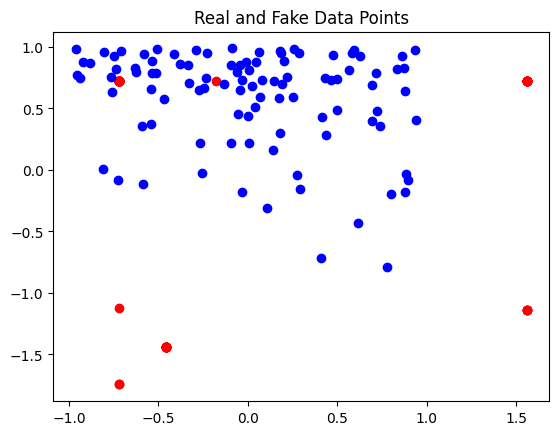

2/2 [==============================] - 0s 5ms/step
Epoch: 41, D Loss Supervised: 1.858, D Acc Supervised: 32.81%, D Loss Real: 0.249, D Loss Fake: 0.314, G Loss: 10.721
2/2 [==============================] - 0s 4ms/step
Epoch: 42, D Loss Supervised: 1.955, D Acc Supervised: 31.25%, D Loss Real: 0.266, D Loss Fake: 0.308, G Loss: 10.694
2/2 [==============================] - 0s 3ms/step
Epoch: 43, D Loss Supervised: 1.904, D Acc Supervised: 35.94%, D Loss Real: 0.213, D Loss Fake: 0.348, G Loss: 10.599
2/2 [==============================] - 0s 4ms/step
Epoch: 44, D Loss Supervised: 1.780, D Acc Supervised: 37.50%, D Loss Real: 0.282, D Loss Fake: 0.321, G Loss: 10.660
2/2 [==============================] - 0s 7ms/step
Epoch: 45, D Loss Supervised: 2.067, D Acc Supervised: 32.81%, D Loss Real: 0.224, D Loss Fake: 0.354, G Loss: 10.640
2/2 [==============================] - 0s 4ms/step
Epoch: 46, D Loss Supervised: 1.817, D Acc Supervised: 37.50%, D Loss Real: 0.267, D Loss Fake: 0.294, G

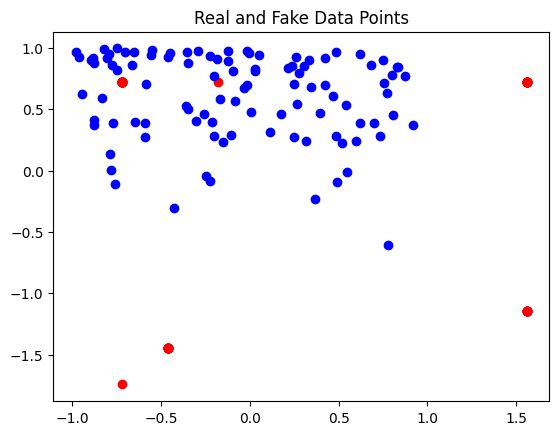

2/2 [==============================] - 0s 3ms/step
Epoch: 51, D Loss Supervised: 1.806, D Acc Supervised: 42.19%, D Loss Real: 0.236, D Loss Fake: 0.235, G Loss: 10.475
2/2 [==============================] - 0s 3ms/step
Epoch: 52, D Loss Supervised: 1.806, D Acc Supervised: 43.75%, D Loss Real: 0.209, D Loss Fake: 0.277, G Loss: 10.513
2/2 [==============================] - 0s 5ms/step
Epoch: 53, D Loss Supervised: 1.779, D Acc Supervised: 50.00%, D Loss Real: 0.208, D Loss Fake: 0.227, G Loss: 10.506
2/2 [==============================] - 0s 3ms/step
Epoch: 54, D Loss Supervised: 1.703, D Acc Supervised: 46.88%, D Loss Real: 0.187, D Loss Fake: 0.229, G Loss: 10.432
2/2 [==============================] - 0s 7ms/step
Epoch: 55, D Loss Supervised: 1.711, D Acc Supervised: 53.12%, D Loss Real: 0.231, D Loss Fake: 0.262, G Loss: 10.445
2/2 [==============================] - 0s 4ms/step
Epoch: 56, D Loss Supervised: 2.457, D Acc Supervised: 43.75%, D Loss Real: 0.223, D Loss Fake: 0.172, G

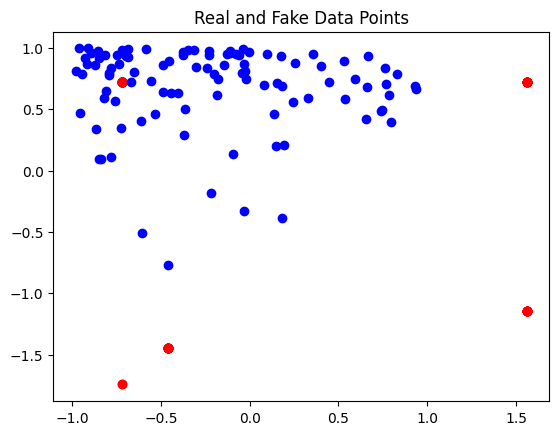

2/2 [==============================] - 0s 5ms/step
Epoch: 61, D Loss Supervised: 1.564, D Acc Supervised: 53.12%, D Loss Real: 0.183, D Loss Fake: 0.184, G Loss: 10.405
2/2 [==============================] - 0s 5ms/step
Epoch: 62, D Loss Supervised: 1.625, D Acc Supervised: 48.44%, D Loss Real: 0.200, D Loss Fake: 0.189, G Loss: 10.412
2/2 [==============================] - 0s 4ms/step
Epoch: 63, D Loss Supervised: 1.576, D Acc Supervised: 57.81%, D Loss Real: 0.201, D Loss Fake: 0.181, G Loss: 10.401
2/2 [==============================] - 0s 4ms/step
Epoch: 64, D Loss Supervised: 1.630, D Acc Supervised: 62.50%, D Loss Real: 0.199, D Loss Fake: 0.215, G Loss: 10.350
2/2 [==============================] - 0s 5ms/step
Epoch: 65, D Loss Supervised: 1.501, D Acc Supervised: 64.06%, D Loss Real: 0.166, D Loss Fake: 0.160, G Loss: 10.469
2/2 [==============================] - 0s 5ms/step
Epoch: 66, D Loss Supervised: 1.617, D Acc Supervised: 50.00%, D Loss Real: 0.151, D Loss Fake: 0.200, G

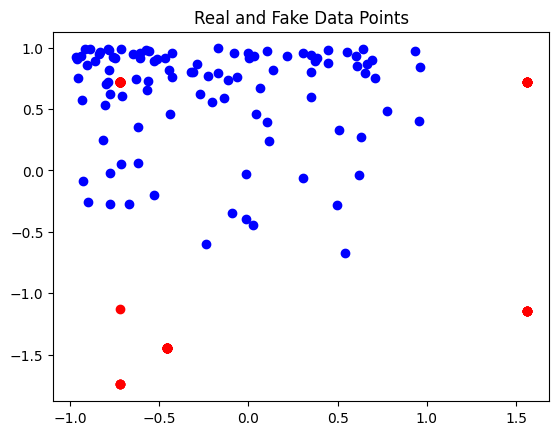

2/2 [==============================] - 0s 4ms/step
Epoch: 71, D Loss Supervised: 1.672, D Acc Supervised: 51.56%, D Loss Real: 0.164, D Loss Fake: 0.137, G Loss: 10.385
2/2 [==============================] - 0s 4ms/step
Epoch: 72, D Loss Supervised: 1.576, D Acc Supervised: 53.12%, D Loss Real: 0.118, D Loss Fake: 0.168, G Loss: 10.332
2/2 [==============================] - 0s 4ms/step
Epoch: 73, D Loss Supervised: 1.647, D Acc Supervised: 54.69%, D Loss Real: 0.156, D Loss Fake: 0.149, G Loss: 10.406
2/2 [==============================] - 0s 4ms/step
Epoch: 74, D Loss Supervised: 1.569, D Acc Supervised: 48.44%, D Loss Real: 0.139, D Loss Fake: 0.118, G Loss: 10.368
2/2 [==============================] - 0s 3ms/step
Epoch: 75, D Loss Supervised: 1.778, D Acc Supervised: 46.88%, D Loss Real: 0.131, D Loss Fake: 0.115, G Loss: 10.334
2/2 [==============================] - 0s 4ms/step
Epoch: 76, D Loss Supervised: 1.634, D Acc Supervised: 50.00%, D Loss Real: 0.175, D Loss Fake: 0.200, G

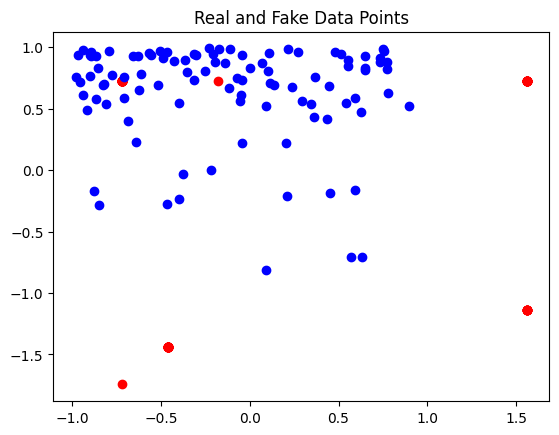

2/2 [==============================] - 0s 4ms/step
Epoch: 81, D Loss Supervised: 1.553, D Acc Supervised: 53.12%, D Loss Real: 0.142, D Loss Fake: 0.151, G Loss: 10.372
2/2 [==============================] - 0s 3ms/step
Epoch: 82, D Loss Supervised: 1.423, D Acc Supervised: 59.38%, D Loss Real: 0.130, D Loss Fake: 0.078, G Loss: 10.420
2/2 [==============================] - 0s 4ms/step
Epoch: 83, D Loss Supervised: 1.529, D Acc Supervised: 50.00%, D Loss Real: 0.112, D Loss Fake: 0.133, G Loss: 10.349
2/2 [==============================] - 0s 6ms/step
Epoch: 84, D Loss Supervised: 1.452, D Acc Supervised: 60.94%, D Loss Real: 0.197, D Loss Fake: 0.108, G Loss: 10.329
2/2 [==============================] - 0s 4ms/step
Epoch: 85, D Loss Supervised: 1.370, D Acc Supervised: 64.06%, D Loss Real: 0.097, D Loss Fake: 0.151, G Loss: 10.352
2/2 [==============================] - 0s 7ms/step
Epoch: 86, D Loss Supervised: 1.443, D Acc Supervised: 59.38%, D Loss Real: 0.255, D Loss Fake: 0.106, G

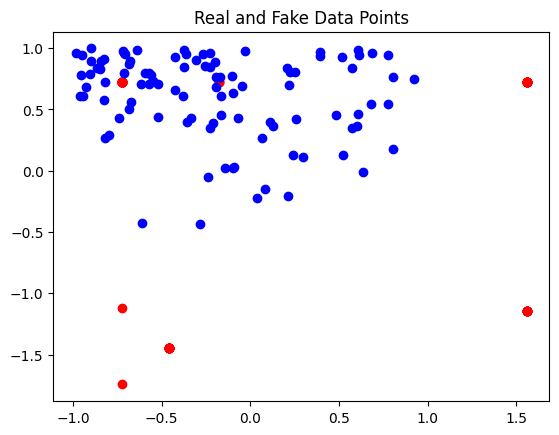

2/2 [==============================] - 0s 9ms/step
Epoch: 91, D Loss Supervised: 1.370, D Acc Supervised: 59.38%, D Loss Real: 0.178, D Loss Fake: 0.110, G Loss: 10.399
2/2 [==============================] - 0s 4ms/step
Epoch: 92, D Loss Supervised: 1.415, D Acc Supervised: 59.38%, D Loss Real: 0.093, D Loss Fake: 0.095, G Loss: 10.335
2/2 [==============================] - 0s 10ms/step
Epoch: 93, D Loss Supervised: 1.485, D Acc Supervised: 53.12%, D Loss Real: 0.154, D Loss Fake: 0.141, G Loss: 10.316
2/2 [==============================] - 0s 4ms/step
Epoch: 94, D Loss Supervised: 1.337, D Acc Supervised: 64.06%, D Loss Real: 0.141, D Loss Fake: 0.134, G Loss: 10.339
2/2 [==============================] - 0s 4ms/step
Epoch: 95, D Loss Supervised: 1.449, D Acc Supervised: 60.94%, D Loss Real: 0.063, D Loss Fake: 0.094, G Loss: 10.410
2/2 [==============================] - 0s 4ms/step
Epoch: 96, D Loss Supervised: 1.316, D Acc Supervised: 59.38%, D Loss Real: 0.096, D Loss Fake: 0.090, 

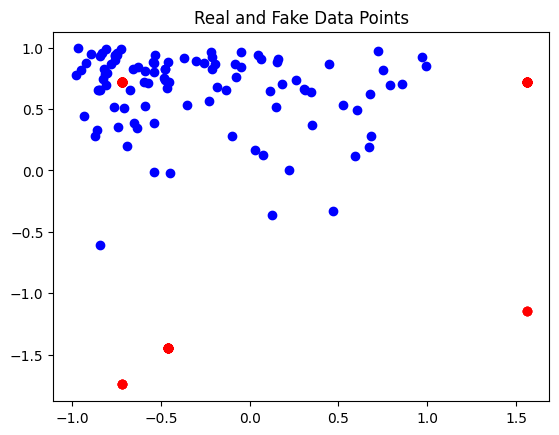

In [ ]:
train(generator, supervised_discriminator, unsupervised_discriminator, gan,
      x_trn, y_trn, latent_dim)


In [ ]:
def classify_new_samples(model, new_samples):
    predictions = model.predict(new_samples)
    return np.argmax(predictions, axis=1)

def generate_synthetic_samples(generator, latent_dim, n_samples):
    # Generate points in latent space
    noise = np.random.normal(0, 1, (n_samples, latent_dim))
    # Predict outputs
    synthetic_samples = generator.predict(noise)
    return synthetic_samples

# Example of generating new samples
new_samples = generate_synthetic_samples(generator, latent_dim, 10)
print(new_samples)

# Example of classifying new samples
new_data = np.random.normal(0, 1, (10, input_dim))  # Assuming the new data has the same feature dimensions
predictions = classify_new_samples(supervised_discriminator, new_data)
print(predictions)


In [ ]:
# Save the model
model_path = '/content/model.h5'  # Specify the path and filename
supervised_discriminator.save(model_path)
print("Model saved to", model_path)


Model saved to /content/model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model

# Load the model
loaded_model = load_model(model_path)
print("Model loaded from", model_path)


Model loaded from /content/model.h5


In [ ]:
x_test.shape

(82332, 20)

In [ ]:
x_tst = x_test[:40000]
y_tst = y_test[:40000]

In [ ]:
import pandas as pd

x_tst = pd.read_csv('x_test40000.csv')
y_tst = pd.read_csv('y_test40000.csv')


In [ ]:


df = pd.DataFrame(x_tst)
df.to_csv('x_test.csv', index=False)
df2 = pd.DataFrame(y_tst)
df2.to_csv('y_test.csv', index=False)



In [ ]:
df3 = pd.DataFrame(x_trn)
df3.to_csv('x_train_final.csv', index=False)
df4 = pd.DataFrame(y_trn)
df4.to_csv('y_train_final.csv', index=False)

In [ ]:
df5 = pd.DataFrame(x_train_1)
df5.to_csv('x_train30_final.csv', index=False)
df6 = pd.DataFrame(y_train_1)
df6.to_csv('y_train30_final.csv', index=False)
df7 = pd.DataFrame(x_train_2)
df7.to_csv('x_train70_final.csv', index=False)
df8 = pd.DataFrame(y_train_2)
df8.to_csv('y_train70_final.csv', index=False)

In [ ]:

# Evaluate the model on test data
loss, accuracy = loaded_model.evaluate(x_tst, y_tst)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


1250/1250 [==============================] - 5s 4ms/step - loss: 1.0515 - accuracy: 0.7900
Test loss: 1.051461100578308
Test accuracy: 0.7900000214576721


In [ ]:
# Make predictions
predictions = loaded_model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes[0])


2573/2573 [==============================] - 6s 2ms/step
6


In [2]:
#